# Example how to access remote HDF5 files 
-- at https://hsds-kc.ideaconsult.net

```shell
# create .hscfg file with the following lines in your home folder
# for Windows it should be in C:\Users\{windows-username}\.hscfg
# Set hs_username and hs_password to your CHARISMA database credentials
hs_endpoint = https://hsds-kc.ideaconsult.net
hs_username = your-username
hs_password = your-password
hs_keycloak_uri = https://iam.ideaconsult.net
hs_keycloak_client_id = solr-kc
hs_keycloak_realm = idea-test
```

In [ ]:
#this cell is only to check if the .hscfg was set correctly ; uncomment print to do so
import h5pyd._apps.hsinfo as hsinfo
#print(hsinfo.cfg)

## Example with h5pyd

annotation_sample <HDF5 group "/annotation_sample" (0 members)>
annotation_sample attribute sample Neon
annotation_study <HDF5 group "/annotation_study" (0 members)>
annotation_study attribute instrument BWTek iRaman
annotation_study attribute investigation Round_Robin_1
annotation_study attribute laser_power 
annotation_study attribute native_filename NeonSNQ043_iR532_Probe_stitched.csv
annotation_study attribute optical_path 
annotation_study attribute provider FMNT-Madrid
annotation_study attribute wavelength 532
baseline_removed <HDF5 dataset "baseline_removed": shape (2, 1800), type "<f8">
baseline_removed attribute CHADA generated on Mon Aug 15 14:42:19 2022
baseline_removed attribute DIMENSION_LABELS ['Raman shift [1/cm]' 'raw counts [1]']
baseline_removed attribute Original file charisma_w_mxgm3a.csv
baseline_removed attribute ﻿Raman shift ['Dark Subtracted #1']
Dataset baseline_removed <HDF5 dataset "baseline_removed": shape (2, 1800), type "<f8"> (2, 1800) 3600 2 float64
[[ 1

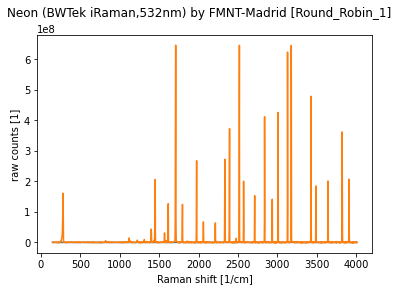

In [1]:
import h5pyd
import matplotlib.pyplot as plt

# This is a path to a remote h5 file, not a local path
path = "/Round_Robin_1/FMNT-Madrid/BWTek iRaman/532/NeonSNQ043_iR532_Probe_stitched.cha"
# example how to read the remote HDF5 files (without ramanchada1 or ramanchada2 dependencies)
with h5pyd.File(path) as f:
    for key in f.keys():
        print(key, f[key])
        for a in f[key].attrs:
            print(key,"attribute",a,f[key].attrs[a])        
        if isinstance(f[key], h5pyd.Dataset):
            dset = f[key]
            print("Dataset",key,dset,dset.shape,dset.size,dset.ndim,dset.dtype)
            print(dset[...])
            print("x",dset[0])
            print("y",dset[1])
            plt.plot(dset[0],dset[1])
            plt.xlabel(dset.dims[0].label)
            plt.ylabel(dset.dims[1].label)
            sample = f["annotation_sample"].attrs["sample"]
            instrument = f["annotation_study"].attrs["instrument"]
            wavelength = f["annotation_study"].attrs["wavelength"]
            partner = f["annotation_study"].attrs["provider"]
            investigation = f["annotation_study"].attrs["investigation"]
            plt.suptitle("{} ({},{}nm) by {} [{}]".format(sample, instrument, wavelength, partner, investigation))




## Example with ramanchada1

In [ ]:
from ramanchada.classes import RamanChada
# reads the raw dataset
R = RamanChada(path,raw=True,is_h5pyd=True)
R.plot()

In [ ]:
#raw=False reads the latest processed dataset , i.e. baseline_removed in this case
R = RamanChada(path,raw=False,is_h5pyd=True)
R.plot()

## Example with ramanchda2

In [ ]:
from ramanchada2.io import HSDS

x, y, meta = HSDS.read_cha(path,dataset='/raw',h5module=h5pyd)
#this is metadata from the native file, not the curated metadata from annotation_x groups as above
print(meta)
plt.plot(x,y)

In [ ]:
from ramanchada2.io import HSDS

x, y, meta = HSDS.read_cha(path,dataset='/raw',h5module=h5pyd)
#this is metadata from the native file, not the curated metadata from annotation_x groups as above
print(meta)
plt.plot(x,y)

In [ ]:
# example creating Spectrum class , reading raw dataset from a remote HDF5 file created by ramanchada2
from ramanchada2.spectrum.creators.from_chada import from_chada

spe = from_chada(path,dataset="/raw",h5module=h5pyd)
spe.plot()



### Processing example

In [ ]:
ss0 = spe - spe.moving_minimum(80)
ss1 = spe - spe.moving_minimum(15)
fig, ax = plt.subplots(1, 2, figsize=(15, 5), tight_layout=True)
spe.plot(ax=ax[0], label='original')
ss0.plot(ax=ax[0], label='movmin(80)')
ss1.plot(ax=ax[0], label='movmin(15)')

#spe.plot(ax=ax[1], label='original')
ss0.plot(ax=ax[1], label='movmin(80)')
ss1.plot(ax=ax[1], label='movmin(15)')
ax[1].set_ylim(0, 8000)

In [ ]:
### normalize

In [ ]:
spe = spe.normalize()
spe.plot()

## Read processed dataset example

In [ ]:
# example creating Spectrum class , reading processed dataset from a remote HDF5 file created by ramanchada2
#throws an error ?
spe_processed = from_chada(path,dataset="/baseline_removed",h5module=h5pyd)
print(spe_processed)
#spe.plot()